# Credit Analysis Project

## Imports and dataset loading

In [2]:
import pandas as pd
import numpy as np

The process we will follow to partition data is described on the chart bellow

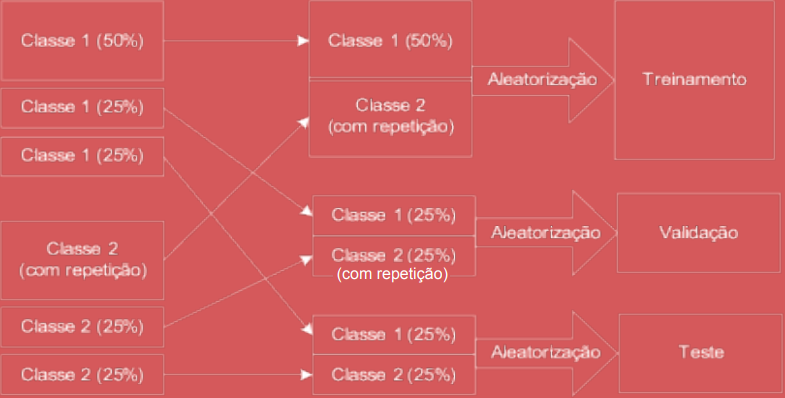

In [3]:
df = pd.read_table('TRNcod.xls')

df.dropna(inplace = True)

df.head()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,0,1,1,1,0,0,0,0,0.135098,1,...,0,0,1,1,0,1,1,1,0,1
1,1,1,0,1,0,0,1,0,0.273504,1,...,0,1,0,1,1,0,0,0,1,0
2,2,1,0,1,0,0,1,0,0.281910,0,...,1,1,0,0,0,0,1,0,1,0
3,3,1,1,1,0,0,0,0,0.225741,0,...,1,1,0,1,1,0,1,0,1,0
4,4,1,1,0,0,0,1,0,0.480403,0,...,1,1,1,0,0,1,0,1,1,0


In [4]:
print('Quantidade de instâncias: {}\nQuantidade de atributos: {}\n'.format(len(df), len(df.columns)))

Quantidade de instâncias: 389196
Quantidade de atributos: 246



### First Step: 
#### Splitting the Dataset on Two Classes

In [5]:
df['IND_BOM_1_2'].value_counts()

0    255098
1    134098
Name: IND_BOM_1_2, dtype: int64

In [6]:
df0 = df.loc[(df['IND_BOM_1_2']) == 0]
print('Quantidade de instâncias na classe 0 :' + str(len(df0)))

Quantidade de instâncias na classe 0 :255098


In [7]:
df1 = df.loc[(df['IND_BOM_1_2']) == 1]
print('Quantidade de instâncias na classe 1 :' + str(len(df1)))

Quantidade de instâncias na classe 1 :134098


### Second Step: 
#### Splitting on train, test and validation and augmenting to compensate data bias

In [8]:
#First we shuffle the dataset
df0 = df0.sample(frac=1, random_state=33)
#Then we split the dataset in three
len_df0 = len(df0)
train_0, validate_0, test_0 = df0[0:int(len_df0*.5)], df0[int(len_df0*.5):int(len_df0*.75)], df0[int(len_df0*.75):]

print("Size of train_0: ", len(train_0), "\nSize of validate_0: ", len(validate_0), "\nSize of test_0:", len(test_0))

Size of train_0:  127549 
Size of validate_0:  63774 
Size of test_0: 63775


In [9]:
#First we shuffle the dataset
df1 = df1.sample(frac=1, random_state=33)
#Then we split the dataset in three
len_df1 = len(df1)
train_1, validate_1, test_1 = df1[0:int(len_df1*.5)], df1[int(len_df1*.5):int(len_df1*.75)], df1[int(len_df1*.75):]

print("Size of train_1: ", len(train_1), "\nSize of validate_1: ", len(validate_1), "\nSize of test_1:", len(test_1))

Size of train_1:  67049 
Size of validate_1:  33524 
Size of test_1: 33525


#### We can see that class 1 contains less samples than class 0, thus we must perform a augmentation on out data to avoid a biased train

In [10]:
train_data_ratio = len(train_1)/len(train_0)
validate_data_ratio = len(validate_1)/len(validate_0)

#We augment our data multiplying its size by 1/ratio 
new_train_1_len = int(len(train_1)/train_data_ratio)
new_validate_1_len = int(len(validate_1)/validate_data_ratio)

#We get a random sample that has the size we need to augment our data
train_1_aug = train_1.sample(frac=1, random_state = 33)[:new_train_1_len - len(train_1)]
validate_1_aug = validate_1.sample(frac=1, random_state = 33)[:new_validate_1_len - len(validate_1)]

#Finally, we concatenate our data with the augmentation data
train_1 = pd.concat([train_1, train_1_aug])
validate_1 = pd.concat([validate_1, validate_1_aug])

print("New train_1 len: " ,len(train_1), "\nNew validate_1 len: ", len(validate_1))

New train_1 len:  127549 
New validate_1 len:  63774


### Third Step:
#### Rejoining the and shuflling datasets

In [12]:
train = pd.concat([train_0, train_1]).sample(frac=1, random_state=33)
validate = pd.concat([validate_0, validate_1]).sample(frac=1, random_state=33)
#The test set does not need to be shuflled
test = pd.concat([test_0, test_1])

## Making a Model for predictions